<img src="Images/ens_slide_1.png" width="700" height="700">

<img src="Images/ens_slide_2.png" width="700" height="700">

## Ensemble Methods 

Ensemble Methods are machine learning algorithms that rely on the "Wisdom of the Crowd"

Many weak algorithms working together do better than 1 big, monolithic algorithm

They are two major groups for ensemble methods: **Random Forests** and **Gradient Boosted Trees**

## Random Forest

Random Forest is a name for a type of supervised learning

***Random Forest*** is just a collection of many small ***Decision Trees***

Assume we have a dataset with 10 columns, and thousands of rows. The Random forest algorithm would start by randomly selecting around 2/3 of the rows, and then randomly selecting 6 columns in the data 

<img src="Images/random_forest.png" width="400" height="400">

### Activity: Apply Random Forest to iris dataset 

Read : https://www.datacamp.com/community/tutorials/random-forests-classifier-python

Finish the turorial on your own, and then answer the following questions:

- What was the feature importance as described in the tutorial: `clf.feature_importances_`

- Change number of estimator (`n_estimators`) and compare the accuracy result

In [12]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

# make dataframe
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

# split the data
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# apply Random Forest model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# evaluate the model
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


petal length (cm)    0.458338
petal width (cm)     0.401868
sepal length (cm)    0.115656
sepal width (cm)     0.024138
dtype: float64


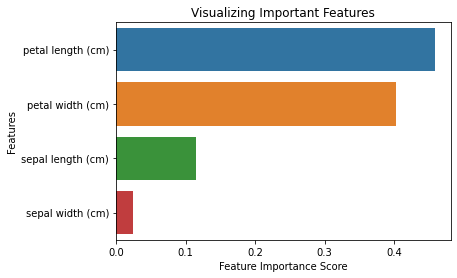

In [13]:
# Feature Ranking reporting, and visualization
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [3]:
# Verify that the feature importances add up to 100%
sum(feature_imp)

1.0

## Gradient Boosting

In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree

The tree that grows next in the sequence **will learn from an updated version of the residuals**

- Residuals: The differences between observed and predicted values of data.


## Activity: We want to build a model for a prediction problem with Boosting method

- Consider the following data, where the years of experience is predictor variable (feature) and salary (in thousand dollars) is the target

<img src="Images/dataset_boosting.png" width="150" height="150">

- Using regression trees as base learners, we can create a model to predict the salary

- As the first step, obtain the mean value of target: `F0 = np.mean(Y)` 

- Now build the simplest decision tree regressor with the Feature as `X` and `Y-F0` as the target: Below is the code

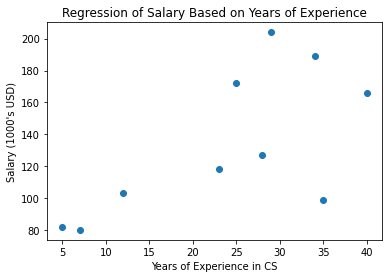

In [47]:
# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

# scatter plot of data
fig, ax = plt.subplots()
plt.scatter(X, Y)
plt.title('Regression of Salary Based on Years of Experience')
ax.set_xlabel('Years of Experience in CS')
ax.set_ylabel("Salary (1000's USD)")
plt.show()

In [48]:
#step one to boosting: get mean of target
f0 = np.mean(Y)  # aka called F0
# then subtract it from every eleme in target, making a new list
y_f0 = [y - f0 for y in Y]

# apply a Regression Tree model
from sklearn.tree import DecisionTreeRegressor
regre = DecisionTreeRegressor(max_depth=1)
regre.fit(X.reshape(-1, 1), (Y-F0).reshape(-1, 1))

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [49]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus

# Draw graph
dot_data = export_graphviz(regre, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('simple_reg_tree_step1.png')

# call predict
h1 = regre.predict(X.reshape(-1, 1))
h1

array([-38.25, -38.25, -38.25, -38.25,  25.5 ,  25.5 ,  25.5 ,  25.5 ,
        25.5 ,  25.5 ])

In [50]:
# add f0 and h1
f1 = [num1 + f0 for num1 in h1]

# making a new model
y_f1 = np.array([y - f for y, f in zip(Y, f1)])
regre2 = DecisionTreeRegressor(max_depth=1)
regre2.fit(np.array(X).reshape(-1, 1), y_f1)
h2 = regre2.predict(X.reshape(-1, 1))
h2

array([  6.75,   6.75,   6.75,   6.75,   6.75,   6.75,   6.75,   6.75,
       -27.  , -27.  ])

In [55]:
def boosting_function(X, Y, iterations_left, target=None, previous_f=None, predictions=None):
    if iterations_left == 0:
        return predictions
    else:
        # init the features to train on
        if predictions is None and previous_f is None:
            f = np.mean(X)
            target = [y - f for y in Y]
        else:
            f = [num + previous_f for num in predictions]
            target = np.array([y - fi for y, fi in zip(Y, f)])
            # make a new model
            regre = DecisionTreeRegressor(max_depth=1)
            # train the model on the features
            regre.train(X, target)
            # get predictions on X
            predictions = regre.predict(X)
            return boosting_function(X, Y, iterations_left - 1, target, f, predictions)
            
output = boosting_function(X, Y, iterations_left=3)
print(output)

None


- As the second step: obtain `h1` as the output result of decision tree regressor with `X` as input : `F1 =F0 + h1` 

- As the third step: build another simple decision tree regressor with Salary as `X` and `Y-F1` as the target

- Keep doing these steps we can predict salary, `Y` from years of experience `X` 

<img src="Images/visualization_boosting.png" width="400" height="400">

## Implementation of Boosting 

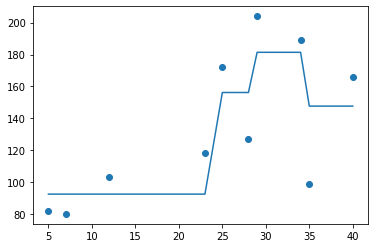

In [5]:
# Iteratively predict Y from X using Boosting method

from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Feature, years of work experience
X = np.array([5, 7, 12, 23, 25, 28, 29, 34, 35, 40])
# Target, salary in in thousand dollars
Y = np.array([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

iteration = 3
F = np.zeros((iteration+1, len(Y)))
for i in range(iteration):
    regre = DecisionTreeRegressor(max_depth=1)
    if i == 0:
        F[i] = np.mean(Y)
    regre.fit(X.reshape(-1, 1), (Y-F[i]).reshape(-1, 1))
    # h[i] = regre.predict(X.reshape(-1, 1)), we do not need to define separate variable for h
    F[i+1] = F[i] + regre.predict(X.reshape(-1, 1))
    
    

plt.plot(X, F[-1])
plt.scatter(X, Y)

***Demonstrating the Potential of Boosting*** : https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

## Optional: Pseudocode of Boosting Algorithm:

<img src="Images/boosting_algorithm.png" width="600" height="600">

## Xgboost

XGBoost is short for eXtreme Gradient Boosting. It is

· An open-sourced tool

    - Computation in C++
    
    - R/python/Julia interface provided
    
· A variant of the gradient boosting machine 

    - Tree-based model
    
· The winning model for several kaggle competitions

Apply Xgboost to boston housing dataset (https://www.datacamp.com/community/tutorials/xgboost-in-python)

Plot the feature importance

## Optional Reading: XGBoost's hyperparameters

At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:

***learning_rate***: step size shrinkage used to prevent overfitting. Range is [0,1]

***max_depth***: determines how deeply each tree is allowed to grow during any boosting round.

***subsample***: percentage of samples used per tree. Low value can lead to underfitting.

***colsample_bytree***: percentage of features used per tree. High value can lead to overfitting.

***n_estimators***: number of trees you want to build.

***objective***: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

## Summary

- Ensemble Methods are machine learning algorithms that rely on the "Wisdom of the Crowd"

- Many weak algorithms working together do better than 1 big, monolithic algorithm

- In boosting, each tree will learn from an updated version of the residuals

- They are two major groups for ensemble methods:

    - Random Forests 
    
    - Gradient Boosted Trees

- The Ensemble methods are able to obtain and rank the feature importance


## Resources:

- https://www.datacamp.com/community/tutorials/random-forests-classifier-python
    
- https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

- https://www.datacamp.com/community/tutorials/xgboost-in-python
